# Project: Wrangling and Analyze Data

## Table of Contents

<ul>
    <li> <a href="#intro">Introduction </a> </li>
    <li> <a href="#gathering">Data Gathering </a></li>
    <li> <a href="#assessing">Assessing Data </a> </li>
    <li> <a href="#cleaning">Cleaning data </a></li>
    <li> <a href="#storing">Storing Data </a></li>
    <li> <a href="#analysing">Analyzing and Visualizing Data</a> </li>
</ul>

### <div id="intro"> Introduction </div>
<p>In this project, we will be wrangling, analyzing and visualizing of tweet archive from <a href="https://twitter.com/dog_rates" target="_blank" > @dog_rates</a> as known as WeRateDogs.<a href="https://twitter.com/dog_rates" target="_blank"> WeRateDogs </a>is a Twitter account that rates people’s dogs and the ratings almost always have a denominator of 10 and a numerator almost always greater than 10 for example 11/10,12/10 and 13/13. WeRateDogs provided their Twitter archive to Udacity for this project, however, the dataset was not sufficient enough to create interesting analyses and visualizations thus, using web scrapping and Twitter API, I have extracted additional data to fill the gap.
My task in this project was to wrangle Twitter data to create interesting analyses and visualization. </p>

<a href="https://twitter.com/dog_rates"> <img src="tweet.png"> </a>

### <div id="gathering"> Data Gathering </div>
1.First, I imported neccessary packages and then I downloaded the provided dataset by WeRateDogs (twitter_archive_enhanced.csv)

In [1]:
#importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy
import json
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [2]:
#reading WeRateDogs Twitter archive datasets using panda
twitter_archive=pd.read_csv("twitter-archive-enhanced.csv")

2.Using  the Requests library, I downloaded the image_predictions dataset (image_predictions.tsv) and saved them as image_pred.csv 

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url)
r

<Response [200]>

In [4]:
with open("image_prediction.csv","wb") as file:
          file.write(r.content)

In [5]:
image_pred=pd.read_csv("image_prediction.csv",sep="\t")

3. I use the json file (tweet_json.txt) since I had access denied to the twitter API  

In [6]:
additional_data = pd.read_json("tweet-json.txt", lines = True)

## <div id="assessing"> Assessing Data </div>
Detecting quality issues and tidiness issue


In [7]:
#viewing twitter_archive
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#viewing image predication data
image_pred.tail(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [11]:
image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [12]:
image_pred.shape

(2075, 12)

In [13]:
image_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [14]:
#viewing tweets extracted using Twitter API               
additional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality issues
<p>1.Checking datatypes and overall stats of all datasets </p>
<p>2.Having noticed that there are many features not relevant to the study, my second approach was to drop the NaN values</p>
<p>3.Then I changed the date format</p>
<p>4.Renamed jpg_url in image_pred table to source </p>
<p>5.Renaming image_num into human readable</p>
<p>6.I found id column (twitter API ) and to remain consistent,I changed the id column to tweet_id </p>
<p>7.Converting true or false in Additional data table into 0 and 1s (int)</p>
<p>8.Checked for unique values in all the datasets </p>
<p>9 Deleting retweets </p>


### Tidiness issues
<p>10. Converting dog stage names from categorical to numerocal data type 
    Foggo,floofer,pupper and puppo are all stages of the dog (All variables), thus this columns violate the rules of tidiness</p>
<p>11.Find and clean all the duplicates in all tables</p>




## <div id="cleaning"> Cleaning Data </div>
Following the assessment done above, the data cleaning is more of fixing the issue documented in the data assessing phase.Thus before cleaning, making coppy of the original data is very neccessary.

In [15]:
# Make copies of original pieces of data
enhanced_archive=twitter_archive.copy()
enhanced_pred=image_pred.copy()
twitter_api=additional_data.copy()

### Issue #1:

#### Define:
Familiarizing with the data 

### Code

In [16]:
enhanced_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
enhanced_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [18]:
enhanced_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
#Image pred dataset
enhanced_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [20]:
enhanced_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
enhanced_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Twitter API data
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Issue #2
Dropping irelevent data
, I found that some columns are not neccessary to complete this project so I decided to drop them

#### Code

In [23]:
enhanced_archive=enhanced_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','expanded_urls'],axis=1)
enhanced_pred=image_pred.iloc[:,:3]
twitter_api=twitter_api.drop(["id_str","truncated","display_text_range","entities","extended_entities","in_reply_to_status_id","in_reply_to_status_id_str","in_reply_to_user_id","in_reply_to_user_id_str","in_reply_to_screen_name","user","geo","coordinates","place","contributors","is_quote_status","retweeted","possibly_sensitive","possibly_sensitive_appealable","lang","retweeted_status","quoted_status_id","quoted_status_id_str","quoted_status"],axis=1)

In [24]:
enhanced_archive.columns    

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Test

In [25]:
enhanced_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num'], dtype='object')

In [26]:
twitter_api.columns

Index(['created_at', 'id', 'full_text', 'source', 'retweet_count',
       'favorite_count', 'favorited'],
      dtype='object')

In [27]:
twitter_api

,created_at,id,full_text,source,retweet_count,favorite_count,favorited
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,False
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,False
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,False
...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,"<a href=""http://twitter.com/download/iphone"" r...",41,111,False
2350,2015-11-16 00:04:52+00:00,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,"<a href=""http://twitter.com/download/iphone"" r...",147,311,False
2351,2015-11-15 23:21:54+00:00,666033412701032449,Here is a very happy pup. Big fan of well-main...,"<a href=""http://twitter.com/download/iphone"" r...",47,128,False
2352,2015-11-15 23:05:30+00:00,666029285002620928,This is a western brown Mitsubishi terrier. Up...,"<a href=""http://twitter.com/download/iphone"" r...",48,132,False


### Issue #3
Changing the date formart

### Code

In [28]:
enhanced_archive['timestamp']=pd.to_datetime(enhanced_archive['timestamp']).dt.date

In [29]:
twitter_api['created_at']=pd.to_datetime(twitter_api['created_at']).dt.date

### Test 

In [30]:
enhanced_archive.head(5)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None


In [31]:
twitter_api.head(5)

,created_at,id,full_text,source,retweet_count,favorite_count,favorited
0,2017-08-01,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,False
1,2017-08-01,892177421306343426,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r...",6514,33819,False
2,2017-07-31,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r...",4328,25461,False
3,2017-07-30,891689557279858688,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r...",8964,42908,False
4,2017-07-29,891327558926688256,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r...",9774,41048,False


### Issue #4:

#### Define
Investigating null values

#### Code

In [32]:
enhanced_archive.isna().sum()

tweet_id                         0
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [33]:
enhanced_pred.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
dtype: int64

In [34]:
#checking null values
twitter_api.isnull().sum()

created_at        0
id                0
full_text         0
source            0
retweet_count     0
favorite_count    0
favorited         0
dtype: int64

### Test
I didnot find null values in the two enhanced datasets

### Issue #5

### Define
Rename jpg_url in image_pred table to source, img_num  to image_number as well as the timestamp to created_at in enhanced_archive

### Code 

In [35]:
enhanced_archive=enhanced_archive.rename(columns={"timestamp":"created_at"})
enhanced_pred=enhanced_pred.rename(columns={"jpg_url":"source","img_num":"image_number"})

### Test

In [36]:
enhanced_archive.columns

Index(['tweet_id', 'created_at', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [37]:
enhanced_pred.columns

Index(['tweet_id', 'source', 'image_number'], dtype='object')

### Issue #6
Renaming id to tweet_d, full text to text

### Code 

In [38]:
twitter_api=twitter_api.rename(columns={"id":"tweet_id","full_text":"text"})

### Test

In [39]:
twitter_api.head(1)

,created_at,tweet_id,text,source,retweet_count,favorite_count,favorited
0,2017-08-01,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r...",8853,39467,False


### Issue #7

### Define
Data type :Converting true and false values into 1s and 0s (int)

### Code

In [40]:
twitter_api['favorited']=twitter_api['favorited'].astype(int)

### Test

In [41]:
twitter_api['favorited'].head(54)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    1
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
Name: favorited, dtype: int32

### Issue #8

### Define
Removing retweets

### Code 

In [42]:
enhanced_archive = enhanced_archive[enhanced_archive['retweeted_status_id'].isnull()]
enhanced_archive.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [43]:
enhanced_archive.head(120)

,tweet_id,created_at,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
129,867421006826221569,2017-05-24,"<a href=""http://twitter.com/download/iphone"" r...",This is Shikha. She just watched you drop a sk...,12,10,Shikha,None,None,None,puppo
131,867051520902168576,2017-05-23,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",13,10,None,None,None,None,None
133,866720684873056260,2017-05-22,"<a href=""http://twitter.com/download/iphone"" r...",He was providing for his family 13/10 how dare...,13,10,None,None,None,None,None
134,866686824827068416,2017-05-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Lili. She can't believe you betrayed h...,12,10,Lili,None,None,None,None


### Issue #9

### Define
Making one colums for the dog's stage 

### Code 

In [44]:
.
enhanced_archive.doggo.replace('None', '', inplace=True)  
enhanced_archive.floofer.replace('None', '', inplace=True)  
enhanced_archive.floofer.replace('None', '', inplace=True)  
enhanced_archive.pupper.replace('None', '', inplace=True)  
enhanced_archive.puppo.replace('None', '', inplace=True) 

enhanced_archive['stage'] = enhanced_archive.doggo + enhanced_archive.floofer + enhanced_archive.pupper + enhanced_archive.puppo

enhanced_archive.loc[enhanced_archive.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
enhanced_archive.loc[enhanced_archive.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
enhanced_archive.loc[enhanced_archive.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
enhanced_archive=enhanced_archive.drop(['doggo','floofer','pupper','puppo'],axis=1)

In [45]:
enhanced_archive.head(12)

,tweet_id,created_at,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,
5,891087950875897856,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,
6,890971913173991426,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,
7,890729181411237888,2017-07-28,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,
8,890609185150312448,2017-07-27,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,
9,890240255349198849,2017-07-26,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo


### Issue #10

### Define 
Checking unique data

In [46]:
enhanced_archive.nunique()

tweet_id              2175
created_at             600
source                   4
text                  2175
rating_numerator        40
rating_denominator      18
name                   956
stage                    8
dtype: int64

In [47]:
enhanced_pred.nunique()

tweet_id        2075
source          2009
image_number       4
dtype: int64

In [48]:
twitter_api.nunique()

created_at         607
tweet_id          2354
text              2354
source               4
retweet_count     1724
favorite_count    2007
favorited            2
dtype: int64

### Issue #8

### Define 
Addressing the issue of duplicates

### Code

In [49]:
#enhanced_archive.drop_duplicates()
enhanced_archive.duplicated().sum()

0

In [50]:
enhanced_pred.duplicated().sum()

0

twitter_api.drop_duplicated()

In [51]:
twitter_api.duplicated().sum()

0

<p> Upon checking, I found no duplicates in both datasets so I am going ahead and store the enhanced datasets </p>

In [68]:
#my_final=pd.concat([enhanced_archive,enhanced_pred,twitter_api], axis="columns")
#my_final.tail(2)

## <div id="storing"> Storing Data </div>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [53]:
twitter_archive_master=enhanced_archive.merge(enhanced_pred,on="tweet_id")
twitter_archive_master.to_csv("twitter_archive_master.csv")

In [54]:
df_master=pd.read_csv("twitter_archive_master.csv",index_col=[0])

In [55]:
df_master.head()

,tweet_id,created_at,source_x,text,rating_numerator,rating_denominator,name,stage,source_y,image_number
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2


In [56]:
twitter_archive_master.to_csv("twitter_archive_master.csv")
twitter_archive_master

,tweet_id,created_at,source_x,text,rating_numerator,rating_denominator,name,stage,source_y,image_number
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1
1990,666044226329800704,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
1991,666033412701032449,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
1992,666029285002620928,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


## <div id="analysing"> Analyzing and Visualizing Data </div>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

<a href="#assessing"> Intro</a>

### Insights:
1.
The insight revealed that most dogs received rating between 10 and 50 and not more than 100

<AxesSubplot:>

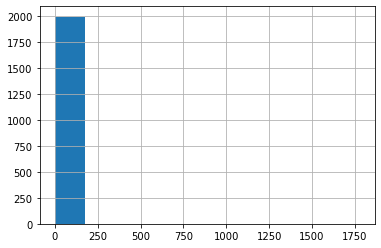

In [57]:
twitter_archive_master['rating_numerator'].hist()

<p>2.I wanted to find the most predicted image number and it turns out that number 1 was the most predicted number</p>

<AxesSubplot:>

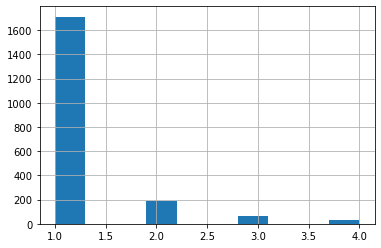

In [58]:
twitter_archive_master['image_number'].hist()

In [59]:
twitter_archive_master

,tweet_id,created_at,source_x,text,rating_numerator,rating_denominator,name,stage,source_y,image_number
0,892420643555336193,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1
1,892177421306343426,2017-08-01,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1
2,891815181378084864,2017-07-31,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1
3,891689557279858688,2017-07-30,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1
4,891327558926688256,2017-07-29,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2
...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1
1990,666044226329800704,2015-11-16,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1
1991,666033412701032449,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1
1992,666029285002620928,2015-11-15,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1


### Visualization

array([[<AxesSubplot:xlabel='tweet_id', ylabel='tweet_id'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='tweet_id'>,
        <AxesSubplot:xlabel='rating_denominator', ylabel='tweet_id'>,
        <AxesSubplot:xlabel='image_number', ylabel='tweet_id'>],
       [<AxesSubplot:xlabel='tweet_id', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='rating_denominator', ylabel='rating_numerator'>,
        <AxesSubplot:xlabel='image_number', ylabel='rating_numerator'>],
       [<AxesSubplot:xlabel='tweet_id', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='rating_denominator', ylabel='rating_denominator'>,
        <AxesSubplot:xlabel='image_number', ylabel='rating_denominator'>],
       [<AxesSubplot:xlabel='tweet_id', ylabel='image_number'>,
        <AxesSubplot:xlabel='rating_numerator', ylabel='image_number'>,
   

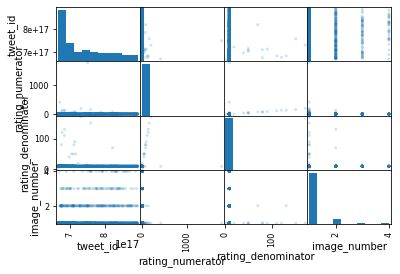

In [62]:
pd.plotting.scatter_matrix(twitter_archive_master, alpha=0.2)

In [65]:
corr=twitter_archive_master.corr()

In [66]:
corr

,tweet_id,rating_numerator,rating_denominator,image_number
tweet_id,1.000000,0.023630,-0.022426,0.212854
rating_numerator,0.023630,1.000000,0.198240,-0.000684
rating_denominator,-0.022426,0.198240,1.000000,-0.004094
image_number,0.212854,-0.000684,-0.004094,1.000000


array([[<AxesSubplot:title={'center':'tweet_id'}>,
        <AxesSubplot:title={'center':'rating_numerator'}>],
       [<AxesSubplot:title={'center':'rating_denominator'}>,
        <AxesSubplot:title={'center':'image_number'}>]], dtype=object)

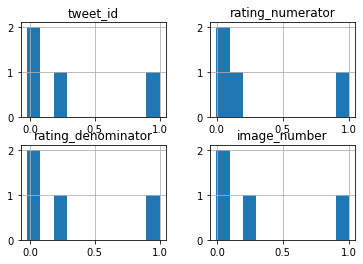

In [67]:
corr.hist()